# Problem Statement:

## An automobile parts manufacturing company has collected data of transactions for 3 years. They do not have any in-house data science team, thus they have hired you as their consultant. Your job is to use your magical data science skills to provide them with suitable insights about their data and their customers.

### Auto Sales Data: Sales_Data.xlsx


### Import the necessary libraries and load the dataset.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from pylab import rcParams
import warnings
warnings.filterwarnings("ignore")


### Read and check the Data


In [2]:
## Importing the excel file
df=pd.read_excel('Sales_Data.xlsx') 

In [3]:
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,DAYS_SINCE_LASTORDER,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,CITY,POSTALCODE,COUNTRY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2018-02-24,828,Shipped,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NYC,10022,USA,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,2018-05-07,757,Shipped,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,Reims,51100,France,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,2018-07-01,703,Shipped,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,Paris,75508,France,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,2018-08-25,649,Shipped,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,Pasadena,90003,USA,Young,Julie,Medium
4,10168,36,96.66,1,3479.76,2018-10-28,586,Shipped,Motorcycles,95,S10_1678,Technics Stores Inc.,6505556809,9408 Furth Circle,Burlingame,94217,USA,Hirano,Juri,Medium
5,10180,29,86.13,9,2497.77,2018-11-11,573,Shipped,Motorcycles,95,S10_1678,Daedalus Designs Imports,20.16.1555,"184, chausse de Tournai",Lille,59000,France,Rance,Martine,Small
6,10188,48,114.84,1,5512.32,2018-11-18,567,Shipped,Motorcycles,95,S10_1678,Herkku Gifts,+47 2267 3215,"Drammen 121, PR 744 Sentrum",Bergen,N 5804,Norway,Oeztan,Veysel,Medium
7,10211,41,114.84,14,4708.44,2019-01-15,510,Shipped,Motorcycles,95,S10_1678,Auto Canal Petit,(1) 47.55.6555,"25, rue Lauriston",Paris,75016,France,Perrier,Dominique,Medium
8,10223,37,107.18,1,3965.66,2019-02-20,475,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",03 9520 4555,636 St Kilda Road,Melbourne,3004,Australia,Ferguson,Peter,Medium
9,10237,23,101.44,7,2333.12,2019-04-05,432,Shipped,Motorcycles,95,S10_1678,Vitachrome Inc.,2125551500,2678 Kingston Rd.,NYC,10022,USA,Frick,Michael,Small



### Exploratory Data Analysis (Univariate, Bi-variate, and multivariate analysis).


In [4]:
df.shape

(2747, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ORDERNUMBER           2747 non-null   int64         
 1   QUANTITYORDERED       2747 non-null   int64         
 2   PRICEEACH             2747 non-null   float64       
 3   ORDERLINENUMBER       2747 non-null   int64         
 4   SALES                 2747 non-null   float64       
 5   ORDERDATE             2747 non-null   datetime64[ns]
 6   DAYS_SINCE_LASTORDER  2747 non-null   int64         
 7   STATUS                2747 non-null   object        
 8   PRODUCTLINE           2747 non-null   object        
 9   MSRP                  2747 non-null   int64         
 10  PRODUCTCODE           2747 non-null   object        
 11  CUSTOMERNAME          2747 non-null   object        
 12  PHONE                 2747 non-null   object        
 13  ADDRESSLINE1      

In [6]:
df.describe(include="all").T

,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
ORDERNUMBER,2747,NaN,NaN,NaN,NaT,NaT,10259.8,91.8775,10100,10181,10264,10334.5,10425
QUANTITYORDERED,2747,NaN,NaN,NaN,NaT,NaT,35.103,9.76214,6,27,35,43,97
PRICEEACH,2747,NaN,NaN,NaN,NaT,NaT,101.099,42.0425,26.88,68.745,95.55,127.1,252.87
ORDERLINENUMBER,2747,NaN,NaN,NaN,NaT,NaT,6.49108,4.23054,1,3,6,9,18
SALES,2747,NaN,NaN,NaN,NaT,NaT,3553.05,1838.95,482.13,2204.35,3184.8,4503.09,14082.8
ORDERDATE,2747,246,2018-11-14 00:00:00,38,2018-01-06,2020-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DAYS_SINCE_LASTORDER,2747,NaN,NaN,NaN,NaT,NaT,1757.09,819.281,42,1077,1761,2436.5,3562
STATUS,2747,6,Shipped,2541,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PRODUCTLINE,2747,7,Classic Cars,949,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSRP,2747,NaN,NaN,NaN,NaT,NaT,100.692,40.1148,33,68,99,124,214


In [7]:
# Check for null/missing values in the dataset
df.isna().sum()

ORDERNUMBER             0
QUANTITYORDERED         0
PRICEEACH               0
ORDERLINENUMBER         0
SALES                   0
ORDERDATE               0
DAYS_SINCE_LASTORDER    0
STATUS                  0
PRODUCTLINE             0
MSRP                    0
PRODUCTCODE             0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
CITY                    0
POSTALCODE              0
COUNTRY                 0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

In [8]:
# Check Duplicates
dups = df.duplicated().sum()
print('Number of duplicate rows = %d' %dups)

Number of duplicate rows = 0


In [10]:
# Unique values in the categorical data
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts(normalize=True))
        print('')

STATUS :  6
Shipped       0.925009
Cancelled     0.021842
Resolved      0.017110
On Hold       0.016017
In Process    0.014925
Disputed      0.005096
Name: STATUS, dtype: float64

PRODUCTLINE :  7
Classic Cars        0.345468
Vintage Cars        0.210775
Motorcycles         0.113942
Planes              0.110666
Trucks and Buses    0.107390
Ships               0.083728
Trains              0.028031
Name: PRODUCTLINE, dtype: float64

PRODUCTCODE :  109
S18_3232    0.018566
S32_2509    0.010193
S50_1392    0.010193
S24_2840    0.010193
S24_1444    0.010193
              ...   
S24_2887    0.008009
S18_2248    0.007645
S18_4409    0.007645
S18_1749    0.007645
S24_3969    0.007645
Name: PRODUCTCODE, Length: 109, dtype: float64

CUSTOMERNAME :  89
Euro Shopping Channel           0.094285
Mini Gifts Distributors Ltd.    0.065526
Australian Collectors, Co.      0.020022
La Rochelle Gifts               0.019294
AV Stores, Co.                  0.018566
                                  ...   
Mi

In [11]:
df.skew()

ORDERNUMBER            -0.006995
QUANTITYORDERED         0.369286
PRICEEACH               0.697222
ORDERLINENUMBER         0.575327
SALES                   1.155940
DAYS_SINCE_LASTORDER   -0.002983
MSRP                    0.575646
dtype: float64


### Univariate Analysis: Dist & Box Plot


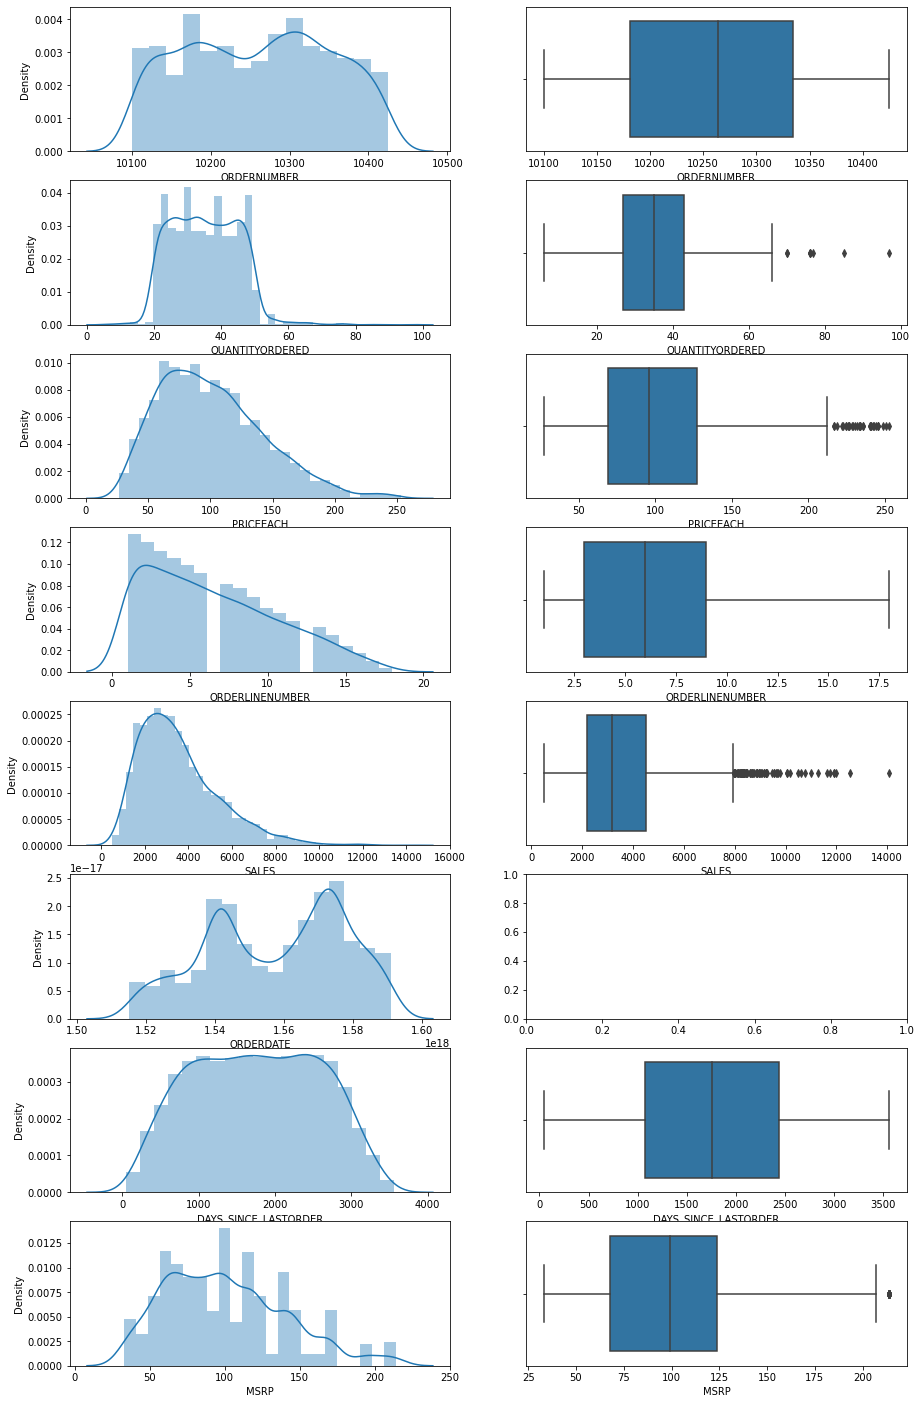

In [17]:
flg, axes = plt.subplots(nrows=8, ncols=2)
flg.set_size_inches(15,25)

sns.distplot(df['ORDERNUMBER'],ax = axes[0][0])
sns.boxplot(df['ORDERNUMBER'],orient = 'H', ax=axes[0][1])

sns.distplot(df['QUANTITYORDERED'],ax = axes[1][0])
sns.boxplot(df['QUANTITYORDERED'],orient = 'H', ax=axes[1][1])

sns.distplot(df['PRICEEACH'],ax = axes[2][0])
sns.boxplot(df['PRICEEACH'],orient = 'H', ax=axes[2][1])

sns.distplot(df['ORDERLINENUMBER'],ax = axes[3][0])
sns.boxplot(df['ORDERLINENUMBER'],orient = 'H', ax=axes[3][1])

sns.distplot(df['SALES'],ax = axes[4][0])
sns.boxplot(df['SALES'],orient = 'H', ax=axes[4][1])

sns.distplot(df['ORDERDATE'],ax = axes[5][0])

sns.distplot(df['DAYS_SINCE_LASTORDER'],ax = axes[6][0])
sns.boxplot(df['DAYS_SINCE_LASTORDER'],orient = 'H', ax=axes[6][1])

sns.distplot(df['MSRP'],ax = axes[7][0])
sns.boxplot(df['MSRP'],orient = 'H', ax=axes[7][1])

plt.show()


### Multivariate Analysis


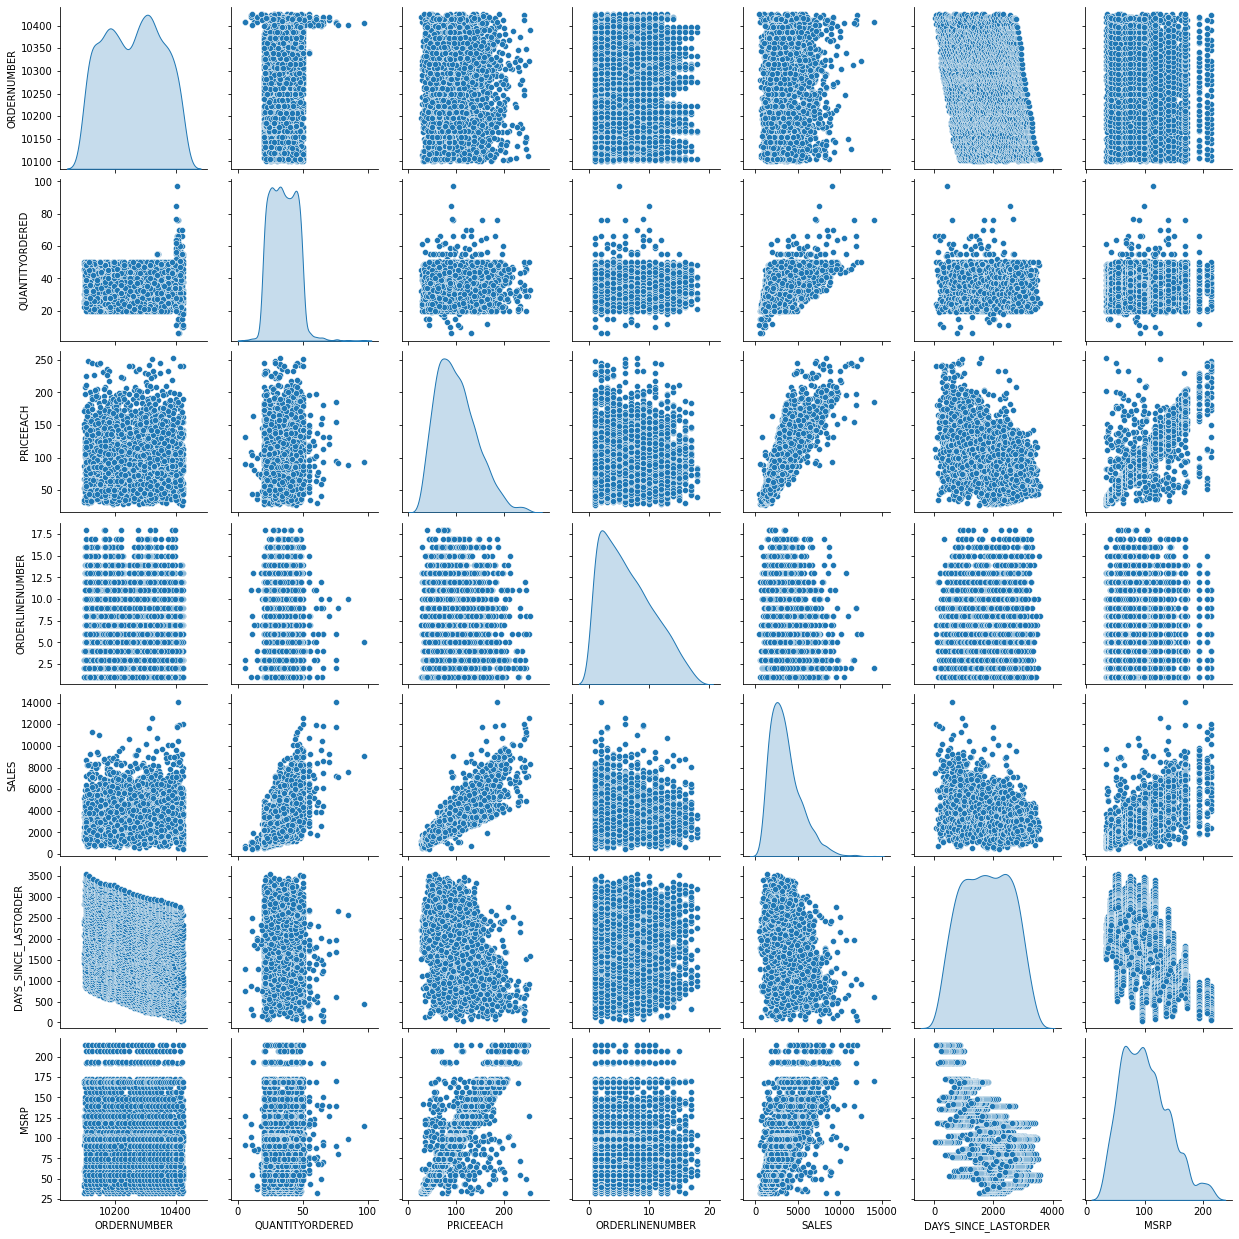

In [18]:
# Pairplot
sns.pairplot(df,diag_kind='kde')
plt.show()

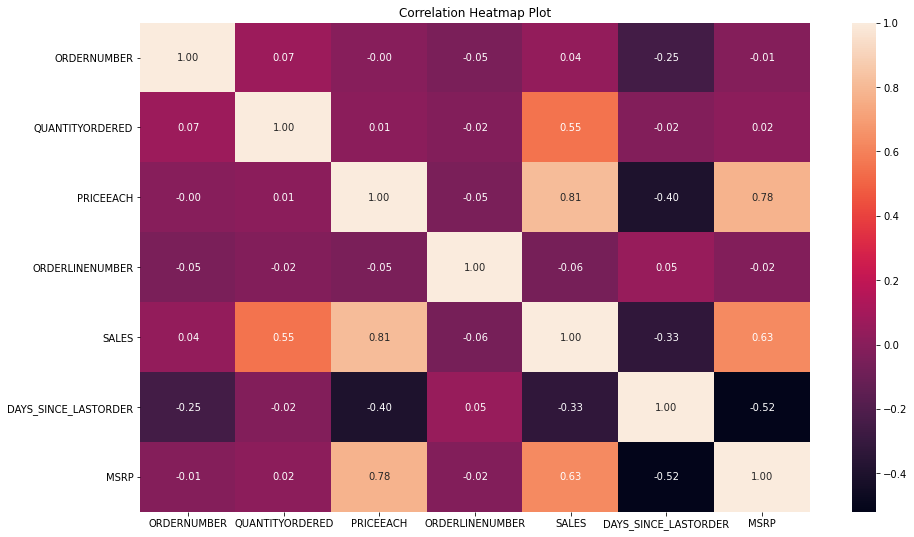

In [19]:
# Plot Correlation Heatmap

plt.figure(figsize=(15,9))
sns.heatmap(round(df.corr(),2),fmt='.2f',annot=True)
plt.title('Correlation Heatmap Plot')
plt.show()


### Time Series data


In [70]:
new_df = df[['ORDERDATE','SALES']].copy()
new_df.head()

,ORDERDATE,SALES
0,2018-02-24,2871.00
1,2018-05-07,2765.90
2,2018-07-01,3884.34
3,2018-08-25,3746.70
4,2018-10-28,3479.76


In [73]:
new_df = new_df.set_index('ORDERDATE')
new_df.head()

,SALES
ORDERDATE,
2018-02-24,2871.00
2018-05-07,2765.90
2018-07-01,3884.34
2018-08-25,3746.70
2018-10-28,3479.76


In [79]:
rcParams['figure.figsize'] = 15,8

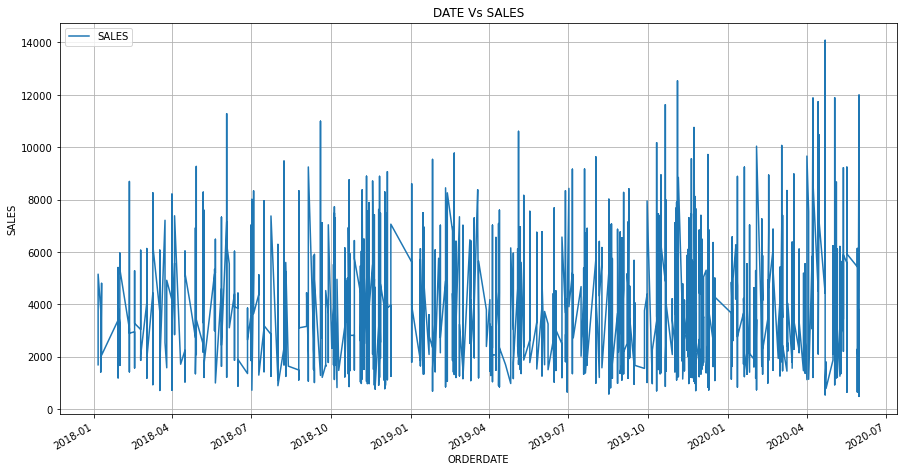

In [87]:
new_df.plot()
plt.title('DATE Vs SALES')
plt.xlabel('ORDERDATE')
plt.ylabel('SALES')
plt.grid();